# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=30000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (30000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


# 1.2 Data Analysis

Number of projects thar are approved for funding  25380 , ( 84.6 %)
Number of projects thar are not approved for funding  4620 , ( 15.4 %)


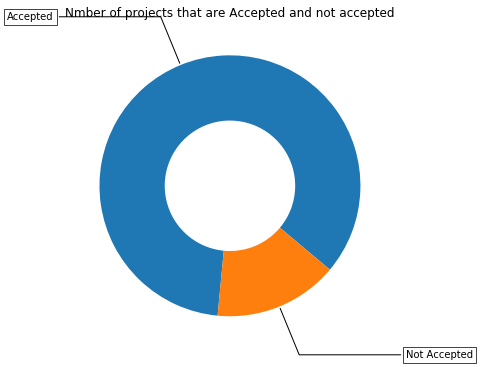

In [5]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

# OBSERVATION 1:
<ul>
 <li>  To observing the data(to exploring the whole data analysis) ,as we can see that the number of approved projects for funding  is near about 85% ,also to see in the same obeservation in doughtnut chart that is blue part is showing the approved project .</li>
    <li> The number of project that are not approved for funding is near about 15% ,as we can also see that in the doughtnut chart Orange part is showing the number of not approved project . </li>    
 </ul>       

### 1.2.1 Univariate Analysis: School State

In [6]:
# Pandas dataframe groupby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict (
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='us-map-heat-map')


# OBSERVATION 2:
<ul>
    <li> To above heat map is showing the number of approvals and not approvals rate states wise.
    <li> To analyse the school states , we can see in the US maps that below 85% (85% is the average approvals rate) is 
    Vermont,
    District of Columbia,
    Texas,
    Montana,
    Louisiana are the states,
which represent the minority of the project.</li>
    <li> The top highest rate of approvals which are above 85% is 
     New Hampshire,
     Ohio,
     Washington,
     North Dakota,
     Delaware,
are the states which account for the majority of the projects.</li>
    <li>The dark color zone which represent maximum acceptance rate and light color zone represent minimum acceptance rate.<li>
     - maximum:DE state with 89.7%
     & minimum:VT state with 80.0%  
        
  </ul>

In [7]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
26         MT       0.723077
7          DC       0.775510
50         WY       0.787879
37         OR       0.798319
0          AK       0.802083
States with highest % approvals
   state_code  num_proposals
17         KY       0.881159
47         WA       0.884323
30         NH       0.886364
32         NM       0.887324
8          DE       0.905263


In [8]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('Number of projects aproved vs rejected')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [9]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

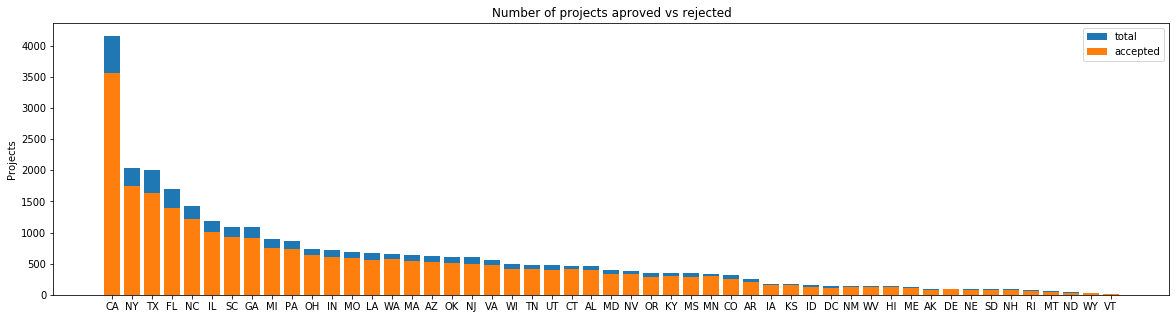

   school_state  project_is_approved  total       Avg
4            CA                 3564   4157  0.857349
34           NY                 1745   2035  0.857494
43           TX                 1638   2002  0.818182
9            FL                 1399   1693  0.826344
27           NC                 1219   1432  0.851257
   school_state  project_is_approved  total       Avg
39           RI                   64     75  0.853333
26           MT                   47     65  0.723077
28           ND                   36     41  0.878049
50           WY                   26     33  0.787879
46           VT                   13     15  0.866667


In [10]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

__SUMMARY: Every state has greater than 80% success rate in approval__


# OBSERVATION 3:
- In above univariate analysis is between the features **"project_is_approved"** and **"school state"** to find the acceptance rate
- To analyse the above data, the lowest rate of acceptance is 80% so we can say that every state which has greater than 80% is success rate of acceptance.
- The states which has giving higher number of submission has more chances to acceptance rate ,but those states who has less number of submission also the chances is same like VT & WY.


### 1.2.2 Univariate Analysis: teacher_prefix

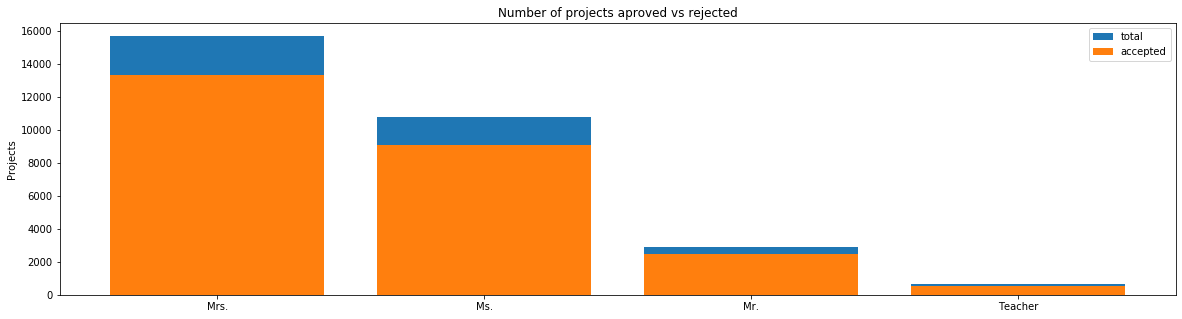

  teacher_prefix  project_is_approved  total       Avg
1           Mrs.                13310  15682  0.848744
2            Ms.                 9099  10779  0.844141
0            Mr.                 2457   2895  0.848705
3        Teacher                  513    643  0.797823
  teacher_prefix  project_is_approved  total       Avg
1           Mrs.                13310  15682  0.848744
2            Ms.                 9099  10779  0.844141
0            Mr.                 2457   2895  0.848705
3        Teacher                  513    643  0.797823


In [11]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

# OBSERVATION 4:
- In above univariate analysis is between the features **"project_is_approved"** and **"teacher_prefix"** to find the acceptance rate
- The various teacher_prefix is used Mrs.,Ms.,techer,Dr.,who submitted the project for approval.
- to analyse the data we can see highest number of submission and highest number of approval is from Mrs.
- Dr. has very less number of submission.

### 1.2.3 Univariate Analysis: project_grade_category

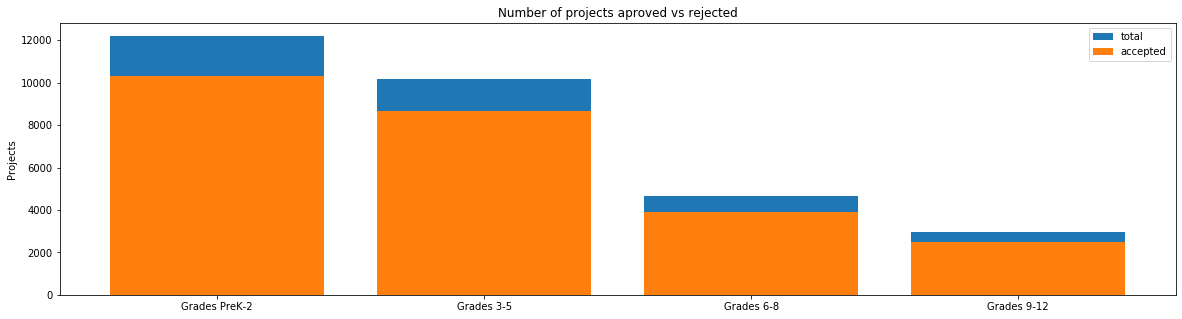

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                10324  12204  0.845952
0             Grades 3-5                 8663  10160  0.852657
1             Grades 6-8                 3897   4663  0.835728
2            Grades 9-12                 2496   2973  0.839556
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                10324  12204  0.845952
0             Grades 3-5                 8663  10160  0.852657
1             Grades 6-8                 3897   4663  0.835728
2            Grades 9-12                 2496   2973  0.839556


In [12]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

# OBSERVATION 5:
- Above  univariate analysis is b/w  **'project_is_approved'** ,**"project_grade_category"**, featues to find the acceptance rate among the students who is studying in various grades
- We explore the different categories of approved and not approved projects based on Category.
- All the grades are 80% above.
- Grades PreK-2 is the most popular followed by Grades 3-5 , Grades 6-8 and Grades 9-12
- grades 3-5 is average number of approvals.
- The less number of submission and approval is grade 9-12 with 83%.

### 1.2.4 Univariate Analysis: project_subject_categories

In [13]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [14]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports


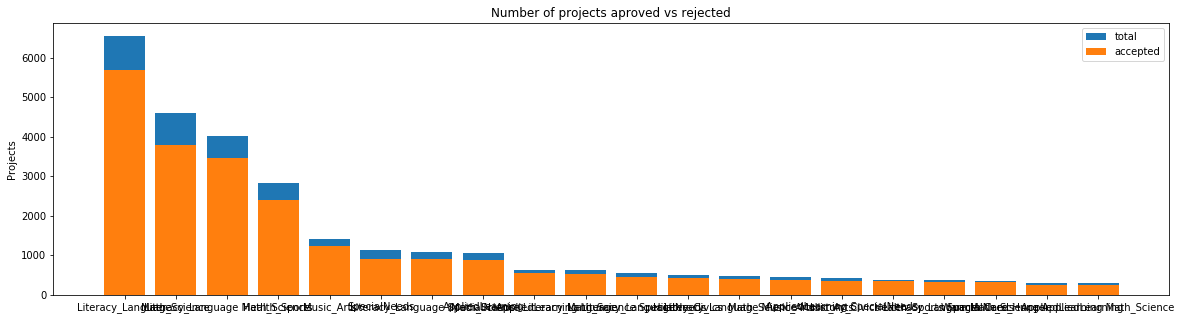

                  clean_categories  project_is_approved  total       Avg
23               Literacy_Language                 5680   6548  0.867440
31                    Math_Science                 3786   4607  0.821793
27  Literacy_Language Math_Science                 3475   4017  0.865073
8                    Health_Sports                 2398   2839  0.844664
39                      Music_Arts                 1228   1426  0.861150
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                  355    386  0.919689
14        Health_Sports SpecialNeeds                  317    378  0.838624
49                Warmth Care_Hunger                  333    359  0.927577
32      Math_Science AppliedLearning                  252    301  0.837209
4       AppliedLearning Math_Science                  240    294  0.816327


In [15]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

# OBSERVATION 6:
- Above univariate analysis is between   **"project_is_approved"** ,**"clean_categories"** featues to find the acceptance rate among the categories under which project is applied.
- Here we can see that the highest number of approvals(i.e. 92.5%) is for **Warmth_care_Hunger** .Most of the people interested for this project.
- The number of lowest acceptance rate is for **AppliedLearning Math_Science** i.e. **81.2%.**


In [16]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

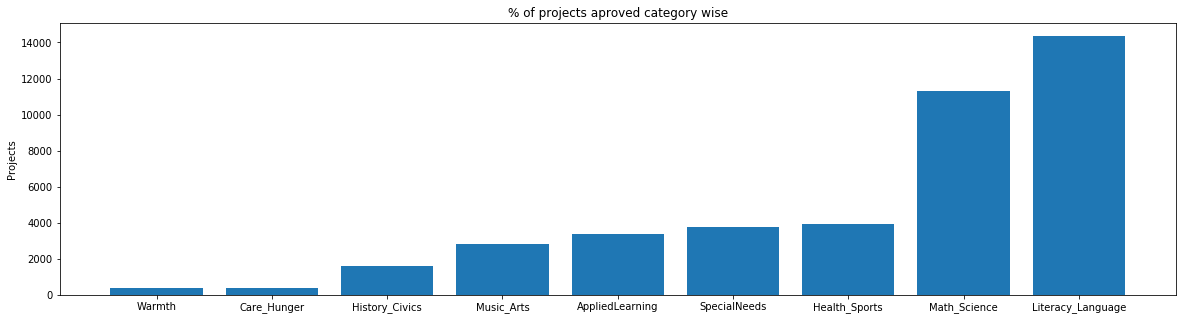

In [17]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved category wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

# OBSERVATION 7:

- In Barplot ,we can see all the individual categories are in incresing order.
- To analyse the barplot we can say ,most of the projects are in **math_science and Literacy_language** .
- **Warmth and care_Hunger** are the very less number of projects submission,but highest number of approval rate.









In [18]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :       384
Care_Hunger          :       384
History_Civics       :      1583
Music_Arts           :      2832
AppliedLearning      :      3374
SpecialNeeds         :      3751
Health_Sports        :      3918
Math_Science         :     11318
Literacy_Language    :     14356


### 1.2.5 Univariate Analysis: project_subject_subcategories

In [19]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [20]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports


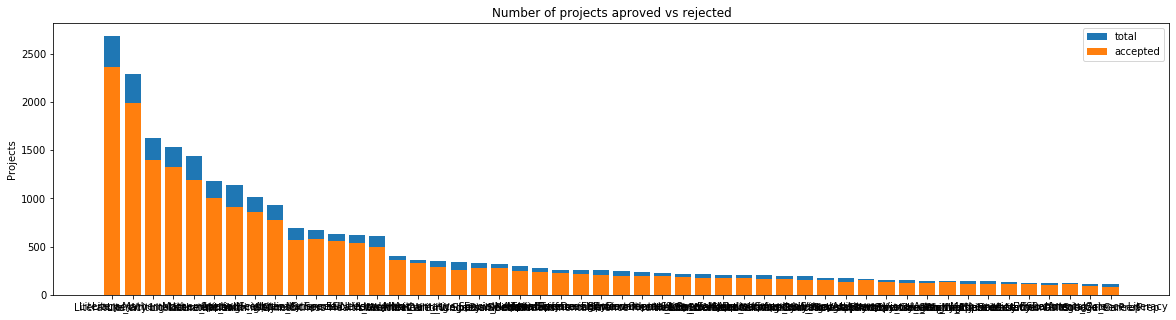

                clean_subcategories  project_is_approved  total       Avg
279                        Literacy                 2366   2685  0.881192
281            Literacy Mathematics                 1994   2289  0.871123
293  Literature_Writing Mathematics                 1401   1627  0.861094
280     Literacy Literature_Writing                 1331   1532  0.868799
303                     Mathematics                 1188   1440  0.825000
                    clean_subcategories  project_is_approved  total       Avg
119                                 ESL                  109    128  0.851562
3    AppliedSciences College_CareerPrep                  100    121  0.826446
340                      PerformingArts                  109    120  0.908333
177       EnvironmentalScience Literacy                   94    113  0.831858
75                   College_CareerPrep                   86    111  0.774775


In [21]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

# OBSERVATION 8:
- Above univariate analysis is between **"project_is_approved"** and **"clean_sub_categories"** features to find the approval rate  among the **"sub_categories"**.
- To analyse the above graph ,the highest number of approval rate is for **"Literacy"** and **"Literacy Mathematics"**,which is 88% and 87%.
- the lowest number acceptance rate is 81% which belong in **"AppliedScience college_careerPrep"**  and **"college _CareerPrep.

In [22]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

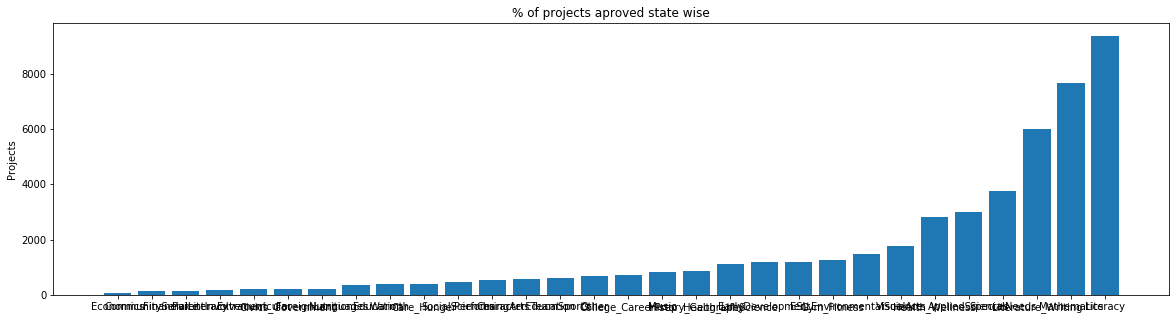

In [23]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [24]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :        83
CommunityService     :       138
FinancialLiteracy    :       154
ParentInvolvement    :       172
Extracurricular      :       203
Civics_Government    :       227
ForeignLanguages     :       228
NutritionEducation   :       366
Warmth               :       384
Care_Hunger          :       384
SocialSciences       :       479
PerformingArts       :       536
CharacterEducation   :       577
TeamSports           :       601
Other                :       685
College_CareerPrep   :       722
Music                :       839
History_Geography    :       862
Health_LifeScience   :      1108
EarlyDevelopment     :      1197
ESL                  :      1206
Gym_Fitness          :      1259
EnvironmentalScience :      1495
VisualArts           :      1754
Health_Wellness      :      2825
AppliedSciences      :      2996
SpecialNeeds         :      3751
Literature_Writing   :      6014
Mathematics          :      7673
Literacy             :      9370


### 1.2.6 Univariate Analysis: Text features (Title)

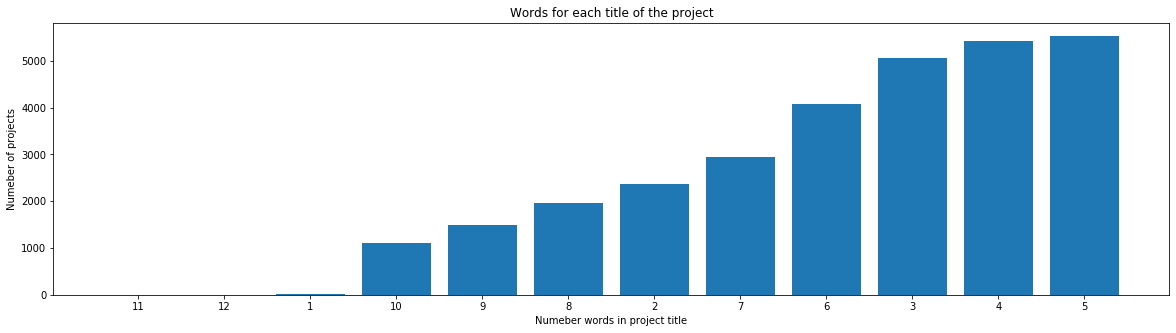

In [25]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.xlabel('Numeber words in project title')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

# OBSERVATION 9:
- Above barplot univariate Analysis between **"number_words_in_project_title"** and **"number_of_projects"**.
- to analyse the barplot ,most of the number of projects are having the number of words > 4.
- ALso their are very less number of projects with having number of words is 13,12,11,1.
- The role of the title  is define that what project is all about. 

In [26]:
approved_title_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_title_word_count = approved_title_word_count.values

rejected_title_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_title_word_count = rejected_title_word_count.values

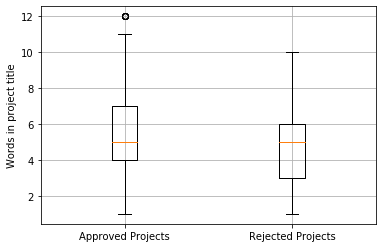

In [27]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_title_word_count, rejected_title_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

# OBSERVATION 10:
- The above boxplot is between **"Approved_Project"** and **"Rejected_project"** vs **"Words_in_project_title"**.
- Both Approved_projects and Rejected _projects classified with 25 percentile and 75 percentile.
- The mean of both the group is almost similar.
- Rejected 25 percentile lied below Approved percentile with words in project title.
- To analyse the things we can say that there is more chance of rejection if project title has less num of words.


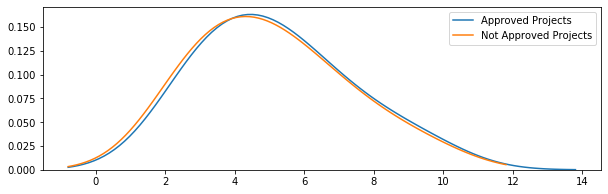

In [28]:
plt.figure(figsize=(10,3))
sns.kdeplot(approved_title_word_count,label="Approved Projects", bw=0.6)
sns.kdeplot(rejected_title_word_count,label="Not Approved Projects", bw=0.6)
plt.legend()
plt.show()

# OBSERVATION 11:
- In above PDF is comparing the Probablities between Approved projects Vs Not Approved projects.
- Blue line is shows Approved Projects and Orange line is shows Not Approved Projects.
- Blue line is always ahead of orange line.
- Peak of both is same that means Both lines mean override.
- To conclude the things we say that there is more chance of rejection if project title has less number of words.


### 1.2.7 Univariate Analysis: Text features (Project Essay's)

In [29]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [30]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

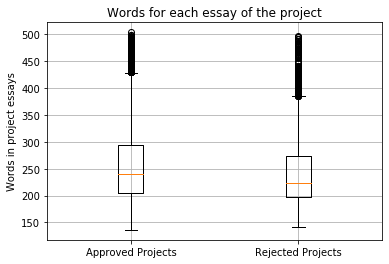

In [31]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project essays')
plt.grid()
plt.show()

# OBSERVATION 12
- This boxplot represent the Approval projects or Rejected projects between Words in projects essays
- To observe the things that more number of words it means that the person has written well or in brief,these may exist possiblity to get approved the projects.
- and if the number of words is limited than might exist chance to get Rejection of the projects.
- We can observe from above bosplot
    -mean of Approved projects: **240 words** 
    -mean of rejected projects: **225 words**
- There also exist difference in 75 percentile.
    -75 percentile of approved: **295 words**
    -75 percentile of rejected: **265 words**

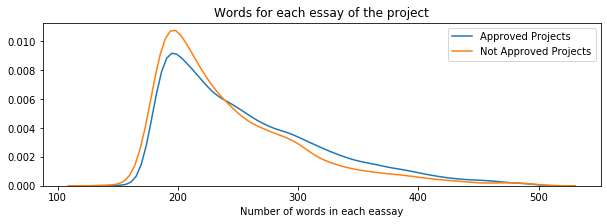

In [32]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

#  OBSERVATION 13
- In above PDF is comparing the Probablities b/w Approved projects vs Not Approved projects
- Blue line is shows Approved Projects and Orange line is shows Not Approved Projects.
- Blue line is always ahead of orange line.
- To conclude that there is more chance of rejection if words for each essay of the project is less.


### 1.2.8 Univariate Analysis: Cost per project

In [33]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [34]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [35]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [36]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

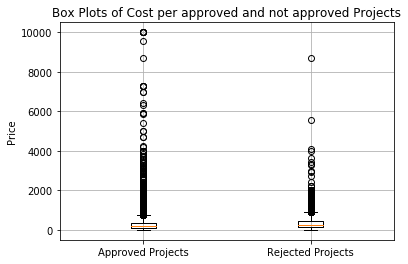

In [37]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Price')
plt.grid()
plt.show()

#  OBSERVATION 14
- Above boxplot represent the cost between approved projects vs not approved projects.
- Their is most of the points are overlapped both approved and not approved projects.
- Nothing is much clear, but Approved Projects is somehow dense

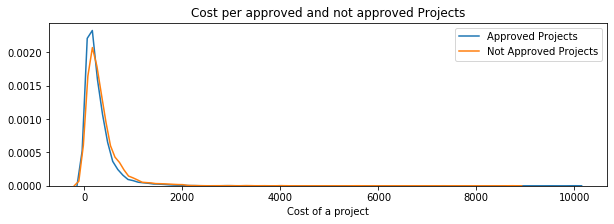

In [38]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

# OBSERVATION 15
- Above PDF is comparing the cost per b/w Approved projects vs Not Approved projects.
- we can observing the gap between orange & blue line just before the 1000 along x-axis.
-  To observe the things itmay clear that if the cost project is affordable by the people than only there is chance to get approval of the projects.
- So it is the very important feature to take care while writing the projects.
- Cost should be affordable by the donors.
- It can conclude that there is more chance of rejection if the cost you are demanding is more.

In [39]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.858      |         39.625        |
|     10     |        34.0       |         71.053        |
|     15     |       58.429      |         96.349        |
|     20     |        78.7       |        116.408        |
|     25     |       99.99       |        136.938        |
|     30     |       117.56      |        158.215        |
|     35     |       137.93      |         179.99        |
|     40     |       157.0       |        203.948        |
|     45     |      178.422      |        230.376        |
|     50     |       199.0       |        255.945        |
|     55     |      223.739      |        284.823        |
|     60     |      254.898      |         314.21        |
|     65     |      284.791      |        353.083       

<h3><font color='red'>1.2.9 Univariate Analysis: teacher_number_of_previously_posted_projects</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

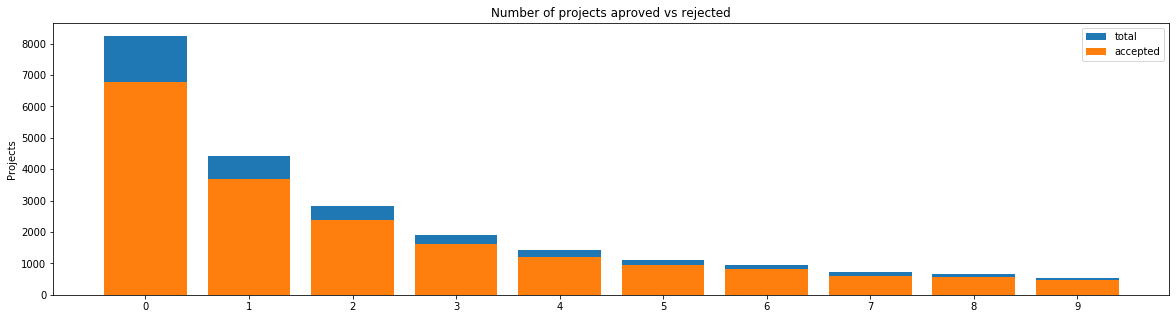

   teacher_number_of_previously_posted_projects  project_is_approved  total  \
0                                             0                 6768   8241   
1                                             1                 3671   4421   
2                                             2                 2382   2838   
3                                             3                 1613   1916   
4                                             4                 1213   1438   

        Avg  
0  0.821260  
1  0.830355  
2  0.839323  
3  0.841858  
4  0.843533  
   teacher_number_of_previously_posted_projects  project_is_approved  total  \
5                                             5                  937   1115   
6                                             6                  817    959   
7                                             7                  609    719   
8                                             8                  577    663   
9                                             

In [40]:
univariate_barplots(project_data, 'teacher_number_of_previously_posted_projects', 'project_is_approved', top=10)

## OBSERVATION 16:
- The above stacked bar plot represent the Approval rate of **"teacher_number_of_previously_posted_projects"**
- To observe the data their is not much different in between the **"total_number_of_project"** and **"approval_of_the_projects"**.
- Highest acceptance rate for **teacher_number_of_previously_posted_projects 9** with **86.77%**
 

In [41]:
approved_details = project_data[project_data['project_is_approved']==1]['teacher_number_of_previously_posted_projects'].values

rejected_details = project_data[project_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects'].values

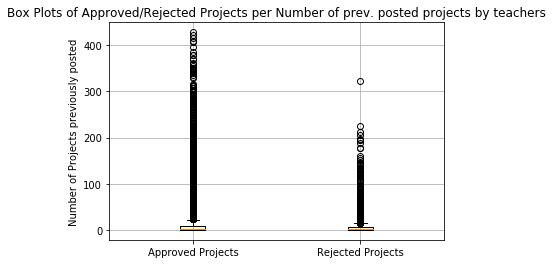

In [42]:
plt.boxplot([approved_details, rejected_details])
plt.title('Box Plots of Approved/Rejected Projects per Number of prev. posted projects by teachers')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Number of Projects previously posted')
plt.grid()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

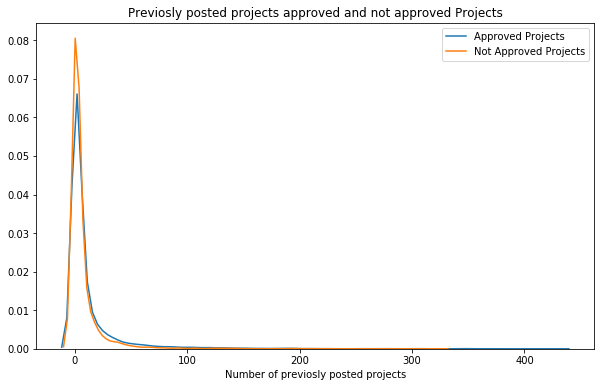

In [43]:
plt.figure(figsize=(10,6))
sns.distplot(approved_details, hist=False, label="Approved Projects")
sns.distplot(rejected_details, hist=False, label="Not Approved Projects")
plt.title('Previosly posted projects approved and not approved Projects')
plt.xlabel('Number of previosly posted projects')
plt.legend()
plt.show

## OBSERVATION 17:
1. Greater the number of submissions by teachers , greater is the acceptance rate
1. Thus, it is a great platform to accept more and more project ideas.

In [44]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_details,i), 3), np.round(np.percentile(rejected_details,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.0        |          0.0          |
|     5      |        0.0        |          0.0          |
|     10     |        0.0        |          0.0          |
|     15     |        0.0        |          0.0          |
|     20     |        0.0        |          0.0          |
|     25     |        0.0        |          0.0          |
|     30     |        1.0        |          0.0          |
|     35     |        1.0        |          1.0          |
|     40     |        1.0        |          1.0          |
|     45     |        2.0        |          1.0          |
|     50     |        2.0        |          2.0          |
|     55     |        3.0        |          2.0          |
|     60     |        4.0        |          3.0          |
|     65     |        5.0        |          4.0         

<h3><font color='red'>1.2.10 Univariate Analysis: project_resource_summary</font></h3>

Please do this on your own based on the data analysis that was done in the above cells

Check if the `presence of the numerical digits` in the `project_resource_summary` effects the acceptance of the project or not. If you observe that `presence of the numerical digits` is helpful in the classification, please include it for further process or you can ignore it.

## 1.3 Text preprocessing

In [45]:

resource_summaries = []

for data in project_data["project_resource_summary"] :
    resource_summaries.append(data)
    
resource_summaries[0:10]

['My students need opportunities to practice beginning reading skills in English at home.',
 'My students need a projector to help with viewing educational programs',
 'My students need shine guards, athletic socks, Soccer Balls, goalie gloves, and training materials for the upcoming Soccer season.',
 'My students need to engage in Reading and Math in a way that will inspire them with these Mini iPads!',
 'My students need hands on practice in mathematics. Having fun and personalized journals and charts will help them be more involved in our daily Math routines.',
 'My students need movement to be successful. Being that I have a variety of students that have all different types of needs, flexible seating would assist not only these students with special needs, but all students.',
 'My students need some dependable laptops for daily classroom use for reading and math.',
 'My students need ipads to help them access a world of online resources that will spark their interest in learning.',

In [46]:
len(resource_summaries)

30000

In [47]:
# https://stackoverflow.com/questions/19859282/check-if-a-string-contains-a-number
numeric_summary_values = {}

for x in tqdm(range(len(resource_summaries))):
    for s in resource_summaries[x].split():
        if s.isdigit() :
            numeric_summary_values[x] = int(s)


100%|██████████| 30000/30000 [00:00<00:00, 202715.11it/s]


In [48]:
 numeric_digits = {}

for c in tqdm(range(len(resource_summaries))) :
    if c in numeric_summary_values.keys() :
        numeric_digits[c] = numeric_summary_values[c]
    else :
        numeric_digits[c] = 0

100%|██████████| 30000/30000 [00:00<00:00, 1563036.41it/s]


In [49]:
for i in range(20):
    print(numeric_digits[i])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
5
0
2
0
0
7


In [50]:
digit_in_summary = []

for a in tqdm(numeric_digits.values()) :
    if a > 0 :
        digit_in_summary.append(1)
    else :
        digit_in_summary.append(0)

100%|██████████| 30000/30000 [00:00<00:00, 784021.14it/s]


In [51]:
print(digit_in_summary[0:100])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [52]:
project_data['digit_in_summary'] = digit_in_summary


In [53]:
project_data.head(10)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,digit_in_summary
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.60,23,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,...,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.00,1,0
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,...,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,"\r\n\""True champions aren't always the ones th...",516.85,22,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,...,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics,I work at a unique school filled with both ESL...,232.90,4,0
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",...,NaN,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics,Our second grade classroom next year will be m...,67.98,4,0
5,141660,p154343,a50a390e8327a95b77b9e495b58b9a6e,Mrs.,FL,2017-04-08 22:40:43,Grades 3-5,Flexible Seating for Mrs. Jarvis' Terrific Thi...,I will be moving from 2nd grade to 3rd grade a...,These flexible seating options will allow my s...,...,NaN,My students need movement to be successful. Be...,1,1,Literacy_Language SpecialNeeds,Literature_Writing SpecialNeeds,I will be moving from 2nd grade to 3rd grade a...,113.22,11,0
6,21147,p099819,9b40170bfa65e399981717ee8731efc3,Mrs.,CT,2017-02-17 19:58:56,Grades 6-8,Chromebooks for Special Education Reading Program,My students are a dynamic and very energetic g...,My students are an engaging and active group o...,...,NaN,My students need some dependable laptops for d...,1,1,Literacy_Language SpecialNeeds,Literacy SpecialNeeds,My students are a dynamic and very energetic g...,159.99,3,0
7,94142,p092424,5bfd3d12fae3d2fe88684bbac570c9d2,Ms.,GA,2016-09-01 00:02:15,Grades 3-5,It's the 21st Century,Not only do our students struggle with poverty...,"My students need 4 iPads, the latest technolog...",...,NaN,My students need ipads to help them access a w...,7,1,Math_Science,Mathematics,Not only do our students struggle with poverty...,229.00,4,0
8,112489,p045029,487448f5226005d08d36bdd75f095b31,Mrs.,SC,2016-09-25 17:00:26,Grades PreK-2,Targeting More Success in Class,My students are enthusiastic and inquisitive l...,My second graders need extra activity time dur...,...,NaN,My students need three devices and three manag...,28,1,Health_Sports,Health_Wellness,My students are enthusiastic and inquisitive l...,241.98,6,0
9,158561,p001713,140eeac1885c820ad5592a409a3a8994,Ms.,NC,2016-11-17 18:18:56,Grades PreK-2,Just For the Love of Reading--\

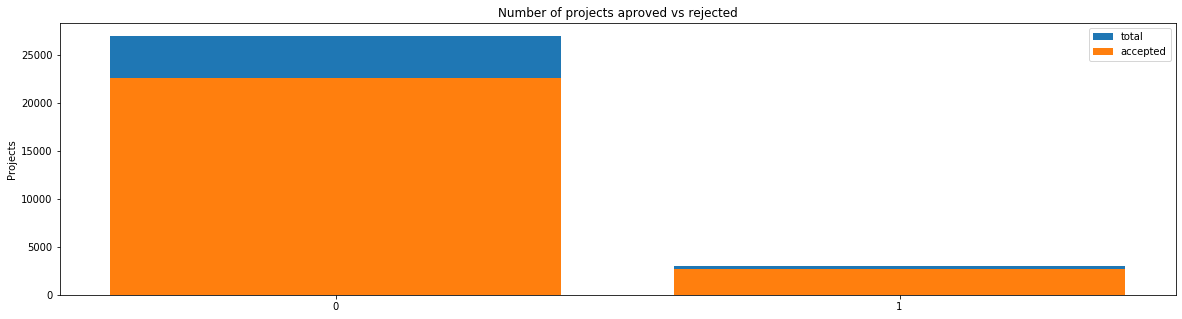

   digit_in_summary  project_is_approved  total       Avg
0                 0                22674  27011  0.839436
1                 1                 2706   2989  0.905320
   digit_in_summary  project_is_approved  total       Avg
0                 0                22674  27011  0.839436
1                 1                 2706   2989  0.905320


In [54]:

univariate_barplots(project_data, 'digit_in_summary', 'project_is_approved', top=2)

## OBSERVATION 18:
1. To observe the things that containing the numeric values have a very high acceptance rate of 92%.
2. The requirements with numerical figures ,greater will be the chance of acceptance of  proposal .
3. It gives the clarity of quantity of resources so that nothing is wasted and can maximize the use of resources so that it will be the better help the children.

### 1.3.1 Essay Text

In [55]:
project_data.head(5)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,digit_in_summary
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.60,23,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,...,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.00,1,0
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,...,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,"\r\n\""True champions aren't always the ones th...",516.85,22,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,...,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics,I work at a unique school filled with both ESL...,232.90,4,0
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",...,NaN,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics,Our second grade classroom next year will be m...,67.98,4,0


In [56]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[2000])
print("="*50)
print(project_data['essay'].values[3000])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [57]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [58]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [59]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [60]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [61]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [62]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 30000/30000 [00:23<00:00, 1253.52it/s]


In [63]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h3><font color='red'>1.3.2 Project title Text</font></h3>

In [64]:
# similarly you can preprocess the titles also
preprocessed_title=[]
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_title.append(sent.lower().strip())

100%|██████████| 30000/30000 [00:01<00:00, 28013.97it/s]


In [65]:
# after preprocesing
preprocessed_title[2000]

'steady stools active learning'

## 1. 4 Preparing data for models

In [66]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'digit_in_summary'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data
       
       - quantity : numerical
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

### CLEAN CATEGORIES

In [67]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (30000, 9)


### CLEAN SUBCATEGORIES

In [68]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot = vectorizer.transform(project_data['clean_subcategories'].values)
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (30000, 30)


### SCHOOL STATE

In [69]:
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also

#State
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())


school_state_one_hot = vectorizer.transform(project_data['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encodig  (30000, 51)


### TEACHER PREFIX

when we are process to remove the nan in teacher prefix the number of data points should be less from the original .

In [70]:
'''
#https://datascience.stackexchange.com/questions/30249/how-to-delete-entire-row-if-values-in-a-column-are-nan
project_data.isna().sum() # count NULLs before filtering
project_data = project_data[pd.notnull(project_data['teacher_prefix'])]
project_data.isna().sum() # count NULLs after removing null values from techer_prefix Column
'''

Unnamed: 0                                          0
id                                                  0
teacher_id                                          0
teacher_prefix                                      0
school_state                                        0
project_submitted_datetime                          0
project_grade_category                              0
project_title                                       0
project_essay_1                                     0
project_essay_2                                     0
project_essay_3                                 28986
project_essay_4                                 28986
project_resource_summary                            0
teacher_number_of_previously_posted_projects        0
project_is_approved                                 0
clean_categories                                    0
clean_subcategories                                 0
essay                                               0
price                       

In [71]:
'''
# Please do the similar feature encoding with state, teacher_prefix and project_grade_category also

#Teacher_Prefix
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(project_data['teacher_prefix'].values.astype(str))
print(vectorizer.get_feature_names())
teacher_prefix_one_hot = vectorizer.transform(project_data['teacher_prefix'].values.astype('U'))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)
'''

['Mr', 'Mrs', 'Ms', 'Teacher']
Shape of matrix after one hot encodig  (29999, 4)


In [70]:
from collections import Counter
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(str(word).split())
    


In [71]:
teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))

In [72]:
# we use count vectorizer to convert the values into one hot encoded features
# for Teacher_Prefix
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)


teacher_prefix_one_hot = vectorizer.fit_transform(project_data['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encoding ",teacher_prefix_one_hot.shape)

['nan', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encoding  (30000, 5)


### PROJECT GRADE

In [73]:
project_data['project_grade_category'].value_counts()

Grades PreK-2    12204
Grades 3-5       10160
Grades 6-8        4663
Grades 9-12       2973
Name: project_grade_category, dtype: int64

In [74]:
grade_catogories = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
grade_list = []
for i in grade_catogories:
    i= i.replace(' ','_') # we are replacing the " " value into 
    i= i.replace('-','') # we are replacing the " " value into 
    grade_list.append(i)

In [75]:
from collections import Counter
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(str(word).split())

In [76]:
project_grade_category_dict = dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))


In [77]:
# we use count vectorizer to convert the values into one hot encoded features
# for Project_Grade_Category
vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_category_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())


project_grade_category_one_hot = vectorizer.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encoding ",project_grade_category_one_hot.shape)

['9-12', '6-8', '3-5', 'PreK-2', 'Grades']
Shape of matrix after one hot encoding  (30000, 5)


### 1.4.2 Vectorizing Text data

#### 1.4.2.1 Bag of words

In [78]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (30000, 10006)


<h4><font color='red'> 1.4.2.2 Bag of Words on `project_title`</font></h4>

In [79]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer = CountVectorizer(min_df=10)
title_bow = vectorizer.fit_transform(preprocessed_title)
print("Shape of matrix after one hot encodig ",title_bow.shape)

Shape of matrix after one hot encodig  (30000, 1536)


#### 1.4.2.3 TFIDF vectorizer

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (30000, 10006)


<h4><font color='red'> 1.4.2.4 TFIDF Vectorizer on `project_title`</font></h4>

In [81]:
# Similarly you can vectorize for title also
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf = vectorizer.fit_transform(preprocessed_title)
print("Shape of matrix after one hot encodig ",title_tfidf.shape)

Shape of matrix after one hot encodig  (30000, 1536)


#### 1.4.2.5 Using Pretrained Models: Avg W2V

In [82]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [83]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [84]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████| 30000/30000 [00:11<00:00, 2688.65it/s]

30000
300


<h4><font color='red'> 1.4.2.6 Using Pretrained Models: AVG W2V on `project_title`</font></h4>

In [85]:
# Similarly you can vectorize for title also
avg_w2v_title_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_title_vectors.append(vector)

print(len(avg_w2v_title_vectors))
print(len(avg_w2v_title_vectors[0]))

100%|██████████| 30000/30000 [00:00<00:00, 42047.49it/s]

30000
300


#### 1.4.2.7 Using Pretrained Models: TFIDF weighted W2V

In [86]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)

# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [87]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|██████████| 30000/30000 [01:16<00:00, 389.93it/s]

30000
300


<h4><font color='red'> 1.4.2.9 Using Pretrained Models: TFIDF weighted W2V on `project_title`</font></h4>

In [88]:
# Similarly you can vectorize for title also
tfidf_w2v_title_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_title): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_vectors.append(vector)

print(len(tfidf_w2v_title_vectors))
print(len(tfidf_w2v_title_vectors[0]))

100%|██████████| 30000/30000 [00:01<00:00, 19308.35it/s]

30000
300


### 1.4.3 Vectorizing Numerical features

### A) PRICE

In [89]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.5973166666666, Standard deviation : 376.0203217475084


In [90]:
price_standardized

array([[-0.38295089],
       [ 0.00107091],
       [ 0.58042789],
       ...,
       [-0.07357931],
       [-0.2623723 ],
       [-0.16126074]])

### B) TEACHER NUMBER OF PREVIOUSLY POSTED PROJECTS

In [91]:
import warnings
warnings.filterwarnings('ignore')
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler #Column Standardisation

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

prev_posts_scalar = StandardScaler()
prev_posts_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {prev_posts_scalar.mean_[0]}, Standard deviation : {np.sqrt(prev_posts_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
prev_posts_standardized = prev_posts_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Mean : 11.211633333333333, Standard deviation : 27.929644549574125


In [92]:
prev_posts_standardized

array([[-0.40142413],
       [-0.15079438],
       [-0.36561988],
       ...,
       [-0.25820713],
       [-0.40142413],
       [-0.15079438]])

### C) QUANTITY

In [93]:
import warnings
warnings.filterwarnings('ignore')
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler #Column Standardisation

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

quantity_scalar = StandardScaler()
quantity_scalar.fit(project_data['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
quantity_standardized = quantity_scalar.transform(project_data['quantity'].values.reshape(-1, 1))

Mean : 16.936166666666665, Standard deviation : 26.64948076990536


In [94]:
quantity_standardized

array([[ 0.22754039],
       [-0.59799164],
       [ 0.19001621],
       ...,
       [-0.44789491],
       [-0.48541909],
       [-0.48541909]])

### 1.4.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [95]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(30000, 9)
(30000, 30)
(30000, 10006)
(30000, 1)


In [96]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(30000, 10046)

<h1><font color='red'>Assignment 2: Apply TSNE<font></h1>

 <font color=#F4274F>If you are using any code snippet from the internet, you have to provide the reference/citations, as we did in the above cells. Otherwise, it will be treated as plagiarism without citations.</font>

<ol> 
    <li> In the above cells we have plotted and analyzed many features. Please observe the plots and write the observations in markdown cells below every plot.</li>
    <li> EDA: Please complete the analysis of the feature: teacher_number_of_previously_posted_projects</li>
    <li>
        <ul>Build the data matrix using these features 
            <li>school_state : categorical data (one hot encoding)</li>
            <li>clean_categories : categorical data (one hot encoding)</li>
            <li>clean_subcategories : categorical data (one hot encoding)</li>
            <li>teacher_prefix : categorical data (one hot encoding)</li>
            <li>project_grade_category : categorical data (one hot encoding)</li>
            <li>project_title : text data (BOW, TFIDF, AVG W2V, TFIDF W2V)</li>
            <li>price : numerical</li>
            <li>teacher_number_of_previously_posted_projects : numerical</li>
         </ul>
    </li>
    <li> Now, plot FOUR t-SNE plots with each of these feature sets.
        <ol>
            <li>categorical, numerical features + project_title(BOW)</li>
            <li>categorical, numerical features + project_title(TFIDF)</li>
            <li>categorical, numerical features + project_title(AVG W2V)</li>
            <li>categorical, numerical features + project_title(TFIDF W2V)</li>
        </ol>
    </li>
    <li> Concatenate all the features and Apply TNSE on the final data matrix </li>
    <li> <font color='blue'>Note 1: The TSNE accepts only dense matrices</font></li>
    <li> <font color='blue'>Note 2: Consider only 5k to 6k data points to avoid memory issues. If you run into memory error issues, reduce the number of data points but clearly state the number of datat-poins you are using</font></li>
</ol>

<h2> 2.1 TSNE with `BOW` encoding of `project_title` feature </h2>

In [97]:
#Cancatenate all the categorical ,numrical features and project title(BOW)....

Y= hstack((categories_one_hot, sub_categories_one_hot, school_state_one_hot,
project_grade_category_one_hot, teacher_prefix_one_hot, price_standardized,
           quantity_standardized, prev_posts_standardized, title_bow))
Y.shape

(30000, 1639)

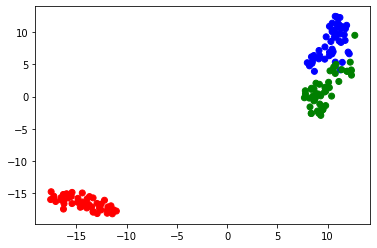

In [98]:
# this is the example code for TSNE
import numpy as np
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = iris['data']
y = iris['target']

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

X_embedding = tsne.fit_transform(x)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.toarray()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(for_tsne_df['Dimension_x'], for_tsne_df['Dimension_y'], c=for_tsne_df['Score'].apply(lambda x: colors[x]))
plt.show()

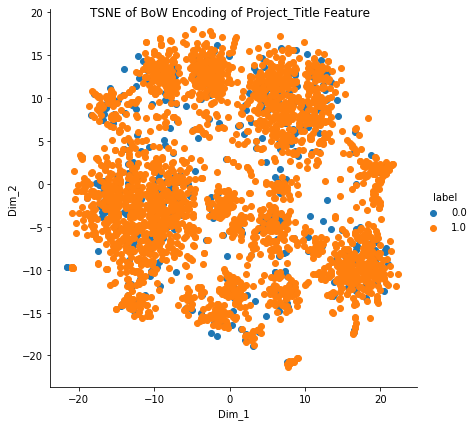

In [104]:
# please write all of the code with proper documentation and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.manifold import TSNE
Y = Y.tocsr()
data_3000 = Y[0:3000,:]
# for conversion of sparse to dense array
new_3000 = data_3000.toarray() 
labels = project_data['project_is_approved']  #The feature we need to plot
labels_3000 = labels[0:3000]
model = TSNE(n_components=2, random_state=0 ,perplexity=100)
tsne_data = model.fit_transform(new_3000)
#Vertical stacking labels to the tsne_data
tsne_data = np.vstack((tsne_data.T, labels_3000)).T
# Create a new data frame for ploting the result
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","label"))
# Ploting the result of tsne usinf Seaborn
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend().fig.suptitle("TSNE of BoW Encoding of Project_Title Feature ")
plt.show() 
    

# OBSERVATION :
- Bag_Of_Word is representing the econding of project title with **blue points shows Acceptance and Orange points shows Rejection.
-  Bag_of_word technique is used for converting text into binary vector form.
- To observe the things we can see that many of the points are in small cluster ,orange and blue points are so much dense .

<h2> 2.2 TSNE with `TFIDF` encoding of `project_title` feature </h2>

In [105]:
#Cancatenate all the categorical ,numrical features and project title(tfidf)....

Y= hstack((categories_one_hot, sub_categories_one_hot, school_state_one_hot,
project_grade_category_one_hot, teacher_prefix_one_hot, price_standardized,
           quantity_standardized, prev_posts_standardized, title_tfidf))
Y.shape

(30000, 1639)

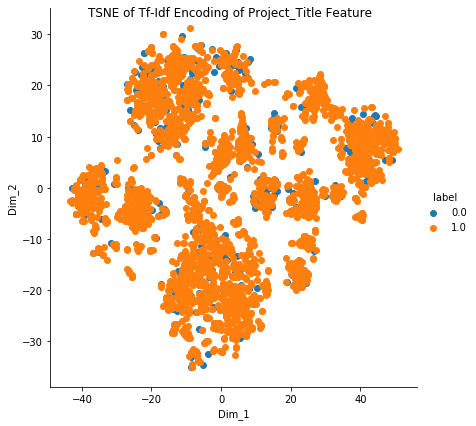

In [106]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.manifold import TSNE
Y = Y.tocsr()
data_3000 = Y[0:3000,:]
# for conversion of sparse to dense array
new_3000 = data_3000.toarray() 
labels = project_data['project_is_approved']  #The feature we need to plot
labels_3000 = labels[0:3000]
model = TSNE(n_components=2, random_state=0 ,perplexity=100)
tsne_data = model.fit_transform(new_3000)
#Vertical stacking labels to the tsne_data
tsne_data = np.vstack((tsne_data.T, labels_3000)).T
# Create a new data frame for ploting the result
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","label"))
# Ploting the result of tsne usinf Seaborn
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend().fig.suptitle("TSNE of Tf-Idf Encoding of Project_Title Feature ")
plt.show()
    

# OBSERVATION:
- TFIDF (term frequency inverse document frequency ) the words that are rarely occurs in the corpus have high demisionality.
- TFIDF accepts multiple words i.e. n-grams.
- The points are change according to the perplexity ,Points are more dense .


<h2> 2.3 TSNE with `AVG W2V` encoding of `project_title` feature </h2>

In [108]:
#Cancatenate all the categorical ,numrical features and project title(AVG W2V)....

Y= hstack((categories_one_hot, sub_categories_one_hot, school_state_one_hot,
project_grade_category_one_hot, teacher_prefix_one_hot, price_standardized,
           quantity_standardized, prev_posts_standardized, avg_w2v_title_vectors))
Y.shape

(30000, 403)

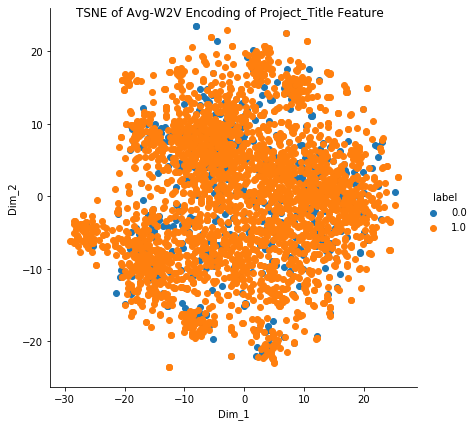

In [109]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.manifold import TSNE
Y = Y.tocsr()
data_3000 = Y[0:3000,:]
# for conversion of sparse to dense array
new_3000 = data_3000.toarray() 
labels = project_data['project_is_approved']  #The feature we need to plot
labels_3000 = labels[0:3000]
model = TSNE(n_components=2, random_state=0 ,perplexity=100)
tsne_data = model.fit_transform(new_3000)
#Vertical stacking labels to the tsne_data
tsne_data = np.vstack((tsne_data.T, labels_3000)).T
# Create a new data frame for ploting the result
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","label"))
# Ploting the result of tsne usinf Seaborn
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend().fig.suptitle("TSNE of Avg-W2V Encoding of Project_Title Feature ")
plt.show()   

# OBSERVATION:
- To observing ,All the words has same weightage or given a equal number of chances .
- it is not a sprase vector like BOW or TFIDF.
- its works to convert the whole sentance into set of vectors.
- Points are more and more dense according to previous one .

<h2> 2.4 TSNE with `TFIDF Weighted W2V` encoding of `project_title` feature </h2>

In [110]:
#Cancatenate all the categorical ,numrical features and project title(TFIDF Weighted W2V)....

Y= hstack((categories_one_hot, sub_categories_one_hot, school_state_one_hot,
project_grade_category_one_hot, teacher_prefix_one_hot, price_standardized,
           quantity_standardized, prev_posts_standardized, tfidf_w2v_title_vectors))
Y.shape

(30000, 403)

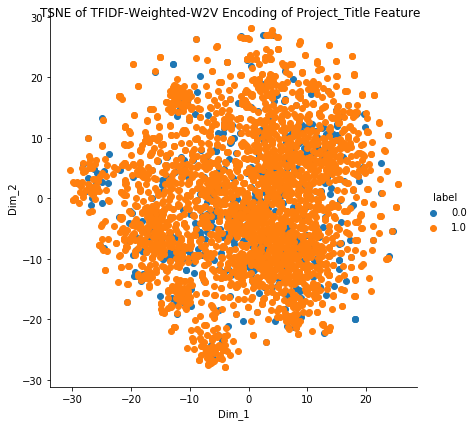

In [111]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.manifold import TSNE
Y = Y.tocsr()
data_3000 = Y[0:3000,:]
# for conversion of sparse to dense array
new_3000 = data_3000.toarray() 
labels = project_data['project_is_approved']  #The feature we need to plot
labels_3000 = labels[0:3000]
model = TSNE(n_components=2, random_state=0 ,perplexity=100)
tsne_data = model.fit_transform(new_3000)
#Vertical stacking labels to the tsne_data
tsne_data = np.vstack((tsne_data.T, labels_3000)).T
# Create a new data frame for ploting the result
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","label"))
# Ploting the result of tsne usinf Seaborn
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend().fig.suptitle("TSNE of TFIDF-Weighted-W2V Encoding of Project_Title Feature ")
plt.show() 

# OBSERVATION:
- TFIDF Weighted W2V is find the nearest words using similarity funciton of pre-trained word embedding.
- word embediing is very useful technique .
- AVG word to vec and TFIDF weigthed W2V both are similary same ,the task is different that it is also calculating each word weightage.


## TSNE with `BOW`, `TFIDF`, `AVG W2V`, `TFIDF Weighted W2V` encoding of `project_title` feature 

In [112]:
Y= hstack((categories_one_hot, sub_categories_one_hot, school_state_one_hot,
project_grade_category_one_hot, teacher_prefix_one_hot, price_standardized,
           quantity_standardized, prev_posts_standardized, title_bow,title_tfidf,avg_w2v_title_vectors,tfidf_w2v_title_vectors))
Y.shape

(30000, 3775)

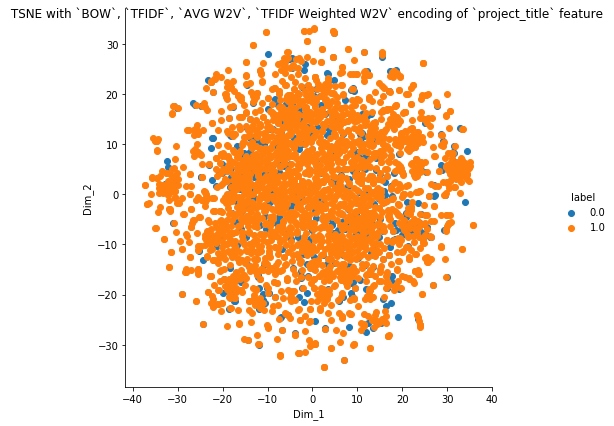

In [113]:
from sklearn.manifold import TSNE
Y = Y.tocsr()
data_3000 = Y[0:3000,:]
# for conversion of sparse to dense array
new_3000 = data_3000.toarray() 
labels = project_data['project_is_approved']  #The feature we need to plot
labels_3000 = labels[0:3000]
model = TSNE(n_components=2, random_state=0 ,perplexity=100)
tsne_data = model.fit_transform(new_3000)
#Vertical stacking labels to the tsne_data
tsne_data = np.vstack((tsne_data.T, labels_3000)).T
# Create a new data frame for ploting the result
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2","label"))
# Ploting the result of tsne usinf Seaborn
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend().fig.suptitle(" TSNE with `BOW`, `TFIDF`, `AVG W2V`, `TFIDF Weighted W2V` encoding of `project_title` feature ")
plt.show() 

# OBSERVATION:
- Due to vital overlapping of points, the visualisation of TSNE with Bag_of_words, TF-IDF, Avg Word2Vec, TF-IDF Weighted Word2Vec does not seem to yield the expected result . 
- Similar points are not forming any clusters. 
- Nothing much could be concluded out of the TSNE.

<h2> 2.5 Summary </h2>

 
- we did so many analysis which we can see that either the project is going to be approved or rejected.
- we observe that every state has the lowest rate of acceptance is 80% so we can say that every state which has greater than 80% is success rate in approval.
- Using T-SNE for the dimension recduction we did different parameter and got the result that **Avg W2V && TF-IDF W2V** is better than **Bow & TF-IDF** .
- Rest all the things i have explained it in the obseravtion .  